<center> <font size=5> <h1>Define working environment</h1> </font> </center> 

The following cells are used to: 
- Import needed libraries
- Set the environment variables for Python, Anaconda, GRASS GIS and R statistical computing 
- Define the ["GRASSDATA" folder](https://grass.osgeo.org/grass73/manuals/helptext.html), the name of "location" and "mapset" where you will to work.

**Import libraries**

In [1]:
## Import libraries needed for setting parameters of operating system 
import os
import sys

## Import library for temporary files creation 
import tempfile 

## Import Pandas library
import pandas as pd

## Import Numpy library
import numpy

## Import Psycopg2 library (interection with postgres database)
import psycopg2 as pg

# Import Math library (usefull for rounding number, e.g.)
import math

## Import Subprocess + subprocess.call
import subprocess
from subprocess import call, Popen, PIPE, STDOUT

<center> <font size=3> <h3>Environment variables when working on Linux Mint</h3> </font> </center> 

**Set 'Python' and 'GRASS GIS' environment variables**

Here, we set [the environment variables allowing to use of GRASS GIS](https://grass.osgeo.org/grass64/manuals/variables.html) inside this Jupyter notebook. Please change the directory path according to your own system configuration.

In [2]:
### Define GRASS GIS environment variables for LINUX UBUNTU Mint 18.1 (Serena)
# Check is environmental variables exists and create them (empty) if not exists.
if not 'PYTHONPATH' in os.environ:
    os.environ['PYTHONPATH']=''
if not 'LD_LIBRARY_PATH' in os.environ:
    os.environ['LD_LIBRARY_PATH']=''
# Set environmental variables
os.environ['GISBASE'] = '/home/tais/SRC/GRASS/grass_trunk/dist.x86_64-pc-linux-gnu'
os.environ['PATH'] += os.pathsep + os.path.join(os.environ['GISBASE'],'bin')
os.environ['PATH'] += os.pathsep + os.path.join(os.environ['GISBASE'],'script')
os.environ['PATH'] += os.pathsep + os.path.join(os.environ['GISBASE'],'lib')
#os.environ['PATH'] += os.pathsep + os.path.join(os.environ['GISBASE'],'etc','python')
os.environ['PYTHONPATH'] += os.pathsep + os.path.join(os.environ['GISBASE'],'etc','python')
os.environ['PYTHONPATH'] += os.pathsep + os.path.join(os.environ['GISBASE'],'etc','python','grass')
os.environ['PYTHONPATH'] += os.pathsep + os.path.join(os.environ['GISBASE'],'etc','python','grass','script')
os.environ['PYTHONLIB'] = '/usr/lib/python2.7'
os.environ['LD_LIBRARY_PATH'] += os.pathsep + os.path.join(os.environ['GISBASE'],'lib')
os.environ['GIS_LOCK'] = '$$'
os.environ['GISRC'] = os.path.join(os.environ['HOME'],'.grass7','rc')
os.environ['PATH'] += os.pathsep + os.path.join(os.environ['HOME'],'.grass7','addons')
os.environ['PATH'] += os.pathsep + os.path.join(os.environ['HOME'],'.grass7','addons','bin')
os.environ['PATH'] += os.pathsep + os.path.join(os.environ['HOME'],'.grass7','addons')
os.environ['PATH'] += os.pathsep + os.path.join(os.environ['HOME'],'.grass7','addons','scripts')

## Define GRASS-Python environment
sys.path.append(os.path.join(os.environ['GISBASE'],'etc','python'))

**-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-**

**Display current environment variables of your computer**

In [3]:
## Display the current defined environment variables
for key in os.environ.keys():
    print "%s = %s \t" % (key,os.environ[key])

MDMSESSION = mate 	
MANDATORY_PATH = /usr/share/gconf/mate.mandatory.path 	
MATE_DESKTOP_SESSION_ID = this-is-deprecated 	
LESSOPEN = | /usr/bin/lesspipe %s 	
MDM_LANG = fr_BE.UTF-8 	
LOGNAME = tais 	
USER = tais 	
HOME = /home/tais 	
XDG_VTNR = 9 	
PATH = /usr/local/bin:/home/tais/BIN:/home/tais/bin:/home/tais/.local/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/home/tais/SRC/GRASS/grass_trunk/dist.x86_64-pc-linux-gnu/bin:/home/tais/SRC/GRASS/grass_trunk/dist.x86_64-pc-linux-gnu/script:/home/tais/SRC/GRASS/grass_trunk/dist.x86_64-pc-linux-gnu/lib:/home/tais/.grass7/addons:/home/tais/.grass7/addons/bin:/home/tais/.grass7/addons:/home/tais/.grass7/addons/scripts 	
CLICOLOR = 1 	
DISPLAY = :0.0 	
SSH_AGENT_PID = 5974 	
LANG = fr_BE.UTF-8 	
TERM = xterm-color 	
SHELL = /bin/bash 	
GIS_LOCK = $$ 	
XAUTHORITY = /home/tais/.Xauthority 	
SESSION_MANAGER = local/tais-HP-Z620-Workstation:@/tmp/.ICE-unix/5837,unix/tais-HP-Z620-Workstation:/tmp/.ICE

**-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-**

<center> <font size=5> <h1>User inputs</h1> </font> </center> 

In [4]:
## Define a empty dictionnary for saving user inputs
user={}

Here after:
- Enter the path to the directory you want to use as "[GRASSDATA](https://grass.osgeo.org/programming7/loc_struct.png)". 
- Enter the name of the location in which you want to work and its projection information in [EPSG code](http://spatialreference.org/ref/epsg/) format. Please note that the GRASSDATA folder and locations will be automatically created if not existing yet. If the location name already exists, the projection information will not be used.  
- Enter the name you want for the mapsets which will be used later for Unsupervised Segmentation Parameter Optimization (USPO), Segmentation and Classification steps.

In [5]:
## Enter the path to GRASSDATA folder
user["gisdb"] = "/media/tais/My_Book_1/MAUPP/Traitement/Ouagadougou/Segmentation_fullAOI_localapproach/GRASSDATA"

## Enter the name of the location (existing or for a new one)
user["location"] = "Ouaga_32630"

## Enter the EPSG code for this location 
user["locationepsg"] = "32630"

## Enter the name of the mapset to use for segmentation
user["segmentation_mapsetname"] = "LOCAL_SEGMENT"

## Enter the name of the mapset to use for classification
user["classificationA_mapsetname"] = "CLASSIF"

**-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-**

<center> <font size=5> <h1>Define GRASSDATA folder and create GRASS' location and mapsets</h1> </font> </center> 

Here after, the python script will check if GRASSDATA folder, locations and mapsets already exist. If not, they will be automatically created.

**Import GRASS Python packages**

In [6]:
## Import libraries needed to launch GRASS GIS in the jupyter notebook
import grass.script.setup as gsetup

## Import libraries needed to call GRASS using Python
import grass.script as grass

**Define GRASSDATA folder and create location and mapsets**

In [7]:
## Automatic creation of GRASSDATA folder
if os.path.exists(user["gisdb"]):
    print "GRASSDATA folder already exist" 
else: 
    os.makedirs(user["gisdb"]) 
    print "GRASSDATA folder created in "+user["gisdb"]

GRASSDATA folder already exist


In [8]:
## Automatic creation of GRASS location is doesn't exist
if os.path.exists(os.path.join(user["gisdb"],user["location"])):
    print "Location "+user["location"]+" already exist" 
else : 
    grass.core.create_location(user["gisdb"], user["location"], epsg=user["locationepsg"], overwrite=False)
    print "Location "+user["location"]+" created"

Location Ouaga_32630 already exist


In [9]:
### Automatic creation of GRASS GIS mapsets

## Import library for file copying 
import shutil

mapsetname=user["classificationA_mapsetname"]
if os.path.exists(os.path.join(user["gisdb"],user["location"],mapsetname)):
    if not os.path.exists(os.path.join(user["gisdb"],user["location"],mapsetname,'WIND')):
        print "WARNING: '"+mapsetname+"' mapset already exist, but a 'WIND' file is missing. Please solve this issue."
    else: print "'"+mapsetname+"' mapset already exist" 
else: 
    os.makedirs(os.path.join(user["gisdb"],user["location"],mapsetname))
    shutil.copy(os.path.join(user["gisdb"],user["location"],'PERMANENT','WIND'),os.path.join(user["gisdb"],user["location"],mapsetname,'WIND'))
    print "'"+mapsetname+"' mapset created in location '"+user["location"]+"'"

'CLASSIF' mapset already exist


In [10]:
### Automatic creation of GRASS GIS mapsets

## Import library for file copying 
import shutil

mapsetname=user["segmentation_mapsetname"]
if os.path.exists(os.path.join(user["gisdb"],user["location"],mapsetname)):
    if not os.path.exists(os.path.join(user["gisdb"],user["location"],mapsetname,'WIND')):
        print "WARNING: '"+mapsetname+"' mapset already exist, but a 'WIND' file is missing. Please solve this issue."
    else: print "'"+mapsetname+"' mapset already exist" 
else: 
    os.makedirs(os.path.join(user["gisdb"],user["location"],mapsetname))
    shutil.copy(os.path.join(user["gisdb"],user["location"],'PERMANENT','WIND'),os.path.join(user["gisdb"],user["location"],mapsetname,'WIND'))
    print "'"+mapsetname+"' mapset created in location '"+user["location"]+"'"

'LOCAL_SEGMENT' mapset already exist


**-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-**

<center> <font size=5> <h1>Define functions</h1> </font> </center> 

This section of the notebook is dedicated to defining functions which will then be called later in the script. If you want to create your own functions, define them here.

### Function for computing processing time

The "print_processing_time" is used to calculate and display the processing time for various stages of the processing chain. At the beginning of each major step, the current time is stored in a new variable, using [time.time() function](https://docs.python.org/2/library/time.html). At the end of the stage in question, the "print_processing_time" function is called and takes as argument the name of this new variable containing the recorded time at the beginning of the stage, and an output message.

In [7]:
## Import library for managing time in python
import time  

## Function "print_processing_time()" compute processing time and printing it.
# The argument "begintime" wait for a variable containing the begintime (result of time.time()) of the process for which to compute processing time.
# The argument "printmessage" wait for a string format with information about the process. 
def print_processing_time(begintime, printmessage):    
    endtime=time.time()           
    processtime=endtime-begintime
    remainingtime=processtime

    days=int((remainingtime)/86400)
    remainingtime-=(days*86400)
    hours=int((remainingtime)/3600)
    remainingtime-=(hours*3600)
    minutes=int((remainingtime)/60)
    remainingtime-=(minutes*60)
    seconds=round((remainingtime)%60,1)

    if processtime<60:
        finalprintmessage=str(printmessage)+str(seconds)+" seconds"
    elif processtime<3600:
        finalprintmessage=str(printmessage)+str(minutes)+" minutes and "+str(seconds)+" seconds"
    elif processtime<86400:
        finalprintmessage=str(printmessage)+str(hours)+" hours and "+str(minutes)+" minutes and "+str(seconds)+" seconds"
    elif processtime>=86400:
        finalprintmessage=str(printmessage)+str(days)+" days, "+str(hours)+" hours and "+str(minutes)+" minutes and "+str(seconds)+" seconds"
    
    return finalprintmessage

### Function for Postgres database vaccum

In [8]:
# Do a VACUUM on the current Postgresql database
def vacuum(db):
    old_isolation_level = db.isolation_level
    db.set_isolation_level(0)
    query = "VACUUM"
    cur.execute(query)
    db.set_isolation_level(old_isolation_level)

**-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-**

In [9]:
## Saving current time for processing time management
begintime_full=time.time()

**-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-**

# Set parameter for Postgresql database connection

In [10]:
# User for postgresql connexion
dbuser="tais"
# Password of user
dbpassword="tais"
# Host of database
host="localhost"
# Name of the new database
dbname="ouaga_fullaoi_localsegment"
# Set name of schema for objects statistics
stat_schema="statistics"
# Set name of schema for samples
sample_schema="samples"
# Set name of schema for classification optical only
classifA_schema="classif_A"
# Set name of schema for classification optical and nDSM
classifB_schema="classif_B"
# Set name of schema for classification SAR only
classifC_schema="classif_C"
# Set name of schema for classification SAR and optical
classifD_schema="classif_D"
# Set name of schema for classification SAR + optical + nDSM + NDVI
classifE_schema="classif_E"

In [11]:
# Set name of table with statistics of segmentobject_stats_table="object_stats_sar"s - FOR OPTICAL
object_stats_optical="object_stats_optical"
# Set name of table with statistics of segmentobject_stats_table="object_stats_sar"s - FOR SAR
object_stats_sar="object_stats_sar"
# Set name of table with all the samples
samples_labels="sample_labels"
# Set name of table with samples without outliers
samples_labels_ok="sample_labels_ok"
# Set name of table with samples without outliers in Optical AOI
sample_opt="sample_opt"
# Set name of table with samples without outliers in Optical AOI - Test set
sample_opt_test="sample_opt_test"
# Set name of table with samples without outliers in Optical AOI - Training set
sample_opt_training="sample_opt_training"
# Set name of table with samples without outliers in SAR AOI
sample_sar="sample_sar"
# Set name of table with samples without outliers in SAR AOI - Test set
sample_test="sample_test"
# Set name of table with samples without outliers in SAR AOI - Training set
sample_training="sample_training"
# Set name of table with results of classification
classif="classif"
# Set name of table with results of classification and ground truth
groundtruth_classif="groundtruth_classif"

<center> <font size=5> <h1>Select samples in segmentation layer</h1> </font>  </center> 

**Launch GRASS GIS working session**

In [16]:
### Automatic creation of GRASS GIS mapsets

## Import library for file copying 
import shutil

## Set the name of the mapset in which to work
mapsetname=classifE_schema

if os.path.exists(os.path.join(user["gisdb"],user["location"],mapsetname)):
    if not os.path.exists(os.path.join(user["gisdb"],user["location"],mapsetname,'WIND')):
        print "WARNING: '"+mapsetname+"' mapset already exist, but a 'WIND' file is missing. Please solve this issue."
    else: print "'"+mapsetname+"' mapset already exist" 
else: 
    os.makedirs(os.path.join(user["gisdb"],user["location"],mapsetname))
    shutil.copy(os.path.join(user["gisdb"],user["location"],'PERMANENT','WIND'),os.path.join(user["gisdb"],user["location"],mapsetname,'WIND'))
    print "'"+mapsetname+"' mapset created in location '"+user["location"]+"'"

'classif_E' mapset already exist


In [17]:
## Launch GRASS GIS working session in the mapset
if os.path.exists(os.path.join(user["gisdb"],user["location"],mapsetname)):
    gsetup.init(os.environ['GISBASE'], user["gisdb"], user["location"], mapsetname)
    print "You are now working in mapset '"+mapsetname+"'" 
else: 
    print "'"+mapsetname+"' mapset doesn't exists in "+user["gisdb"]

You are now working in mapset 'classif_E'


### Create new schema

In [18]:
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT

# Connect to postgres database
db=None
db=pg.connect(dbname=dbname, user='tais', password='tais', host='localhost')

# Allow to create a new database
db.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)

# Execute the CREATE DATABASE query
cur=db.cursor()
#cur.execute('DROP SCHEMA IF EXISTS '+classifE_schema+' CASCADE') #Comment this to avoid deleting existing DB
try:
    cur.execute('CREATE SCHEMA '+classifE_schema)
except Exception as e:
    print ("Exception occured : "+str(e))
cur.close()
db.close()

## Define the folder where to save the results and create it if necessary

In the next cell, please adapt the path to the directory where you want to save the .csv output of i.segment.uspo.

In [18]:
general_path="/media/tais/My_Book_1/MAUPP/Traitement/Ouagadougou/Segmentation_fullAOI_localapproach/Results/CLASSIF"
resultfolder=os.path.join(general_path, classifE_schema)
## Create the folder if does not exists
if not os.path.exists(resultfolder):
    os.makedirs(resultfolder)
    print "Folder '"+resultfolder+"' created"

In [19]:
outputfolder=os.path.join(resultfolder, "classification")
## Create the folder if does not exists
if not os.path.exists(outputfolder):
    os.makedirs(outputfolder)
    print "Folder '"+outputfolder+"' created"

## Create a README.txt file informing about the classification methodology

In [20]:
## Set-up a message
message=""
message+=classifE_schema+" : Classification using Optical, nDSM, NDVI (No SAR). With shadow class."
## Write it in the .txt file
f=open(os.path.join(outputfolder,"readme.txt"),'w')
f.write(message)
f.close()

## Display test and training samples

In [12]:
# Connect to an existing database
db=pg.connect(database=dbname, user=dbuser, password=dbpassword, host=host)
# Open a cursor to perform database operations
cur=db.cursor()

In [16]:
# Query to find the number of row in the test samples
query="SELECT class, min(class_num) as class_num, count(*) FROM "+sample_schema+"."+sample_opt_test+" \
GROUP BY class \
ORDER BY max(class_num) ASC"
# Execute query through panda
df_countperclass=pd.read_sql(query, db)
# Show dataframe
df_countperclass.head(5000)

,class,class_num,count
0,Buildings,11,40
1,Swimming pools,13,40
2,Asphalt surfaces,14,40
3,Brown/red bare soil,21,40
4,White/grey bare soil,22,40
5,Trees,31,40
6,Mixed bare soil/vegetation,32,40
7,Dry vegetation,33,40
8,Other vegetation,34,40
9,Inland waters,41,40


In [17]:
# Print the total number in sample 
print "Test samples counts "+str(sum(df_countperclass['count']))+" points."

Test samples counts 440 points.


In [18]:
# Query to find the number of row in the sample table
query="SELECT class, min(class_num) as class_num, count(*) FROM "+sample_schema+"."+sample_opt_training+" \
GROUP BY class \
ORDER BY max(class_num) ASC"
# Execute query through panda
df_countperclass=pd.read_sql(query, db)
# Show dataframe
df_countperclass.head(5000)

,class,class_num,count
0,Buildings,11,371
1,Swimming pools,13,127
2,Asphalt surfaces,14,100
3,Brown/red bare soil,21,161
4,White/grey bare soil,22,131
5,Trees,31,154
6,Mixed bare soil/vegetation,32,161
7,Dry vegetation,33,138
8,Other vegetation,34,274
9,Inland waters,41,149


In [19]:
# Print the total number in sample 
print "Training samples counts "+str(sum(df_countperclass['count']))+" points."

Training samples counts 1903 points.


## Create csv with statistics for training

In [49]:
# Drop table if exists:
cur.execute("DROP TABLE IF EXISTS "+classifE_schema+"."+sample_training)
# Make the changes to the database persistent
db.commit()

In [50]:
# Create table with 
query="CREATE TABLE "+classifE_schema+"."+sample_training+" AS(\
SELECT a.seg_id, a.class_num, b.* \
FROM "+sample_schema+"."+sample_opt_training+" AS a \
INNER JOIN "+stat_schema+"."+object_stats_optical+" AS b \
ON a.seg_id=b.cat)"
# Execute the query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

# Drop some non wanted columns
query="ALTER TABLE "+classifE_schema+"."+sample_training+" DROP COLUMN cat"
# Execute the query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

In [51]:
# Query to find the number of row in the sample table
query="SELECT * FROM "+classifE_schema+"."+sample_training
# Execute query through panda
df_countperclass=pd.read_sql(query, db)
# Show dataframe
df_countperclass.head(10)

,seg_id,class_num,area,perimeter,compact_circle,compact_square,fd,opt_blue_min,opt_blue_max,opt_blue_range,...,ndsm_perc_90,ndvi_min,ndvi_max,ndvi_range,ndvi_mean,ndvi_stddev,ndvi_median,ndvi_first_quart,ndvi_third_quart,ndvi_perc_90
0,3627475,11,81,52,1.629881,0.692308,1.798283,340,517,177,...,0.921844,-0.024700,0.109208,0.133908,0.026219,0.032277,0.020000,0.000786,0.048626,0.074045
1,4292478,11,32,24,1.196827,0.942809,1.833968,358,417,59,...,3.671480,0.003589,0.097931,0.094342,0.045771,0.021169,0.044261,0.031821,0.057249,0.069552
2,2416875,11,2353,382,2.221506,0.507934,1.531645,277,608,331,...,8.749240,0.037727,0.401734,0.364007,0.130912,0.022166,0.129074,0.123288,0.134809,0.145917
3,4796338,11,113,66,1.751458,0.644251,1.772500,306,455,149,...,0.301270,-0.005551,0.206005,0.211556,0.050478,0.032289,0.044828,0.027888,0.065026,0.089394
4,5387846,11,568,252,2.982782,0.378298,1.743715,227,436,209,...,3.649410,-0.063592,0.237226,0.300818,0.042486,0.044135,0.028361,0.010526,0.064250,0.100787
5,13223032,11,487,128,1.636216,0.689627,1.568139,264,447,183,...,4.702580,0.000762,0.273784,0.273022,0.049758,0.027252,0.042749,0.036254,0.053922,0.076680
6,13107233,11,273,84,1.434145,0.786796,1.579762,265,350,85,...,5.147610,0.053902,0.184481,0.130580,0.143139,0.016689,0.144960,0.138032,0.150470,0.158488
7,6309784,11,2386,402,2.321592,0.486037,1.542025,332,493,161,...,10.873700,-0.122765,0.091023,0.213788,0.026692,0.015509,0.023868,0.019007,0.032141,0.049031
8,5555509,11,88,50,1.503570,0.750467,1.747473,330,418,88,...,0.032349,-0.036624,0.131860,0.168485,0.026967,0.039175,0.023313,-0.002320,0.046407,0.086121
9,2819489,11,637,134,1.497718,0.753399,1.517117,369,764,395,...,5.507170,-0.078014,0.129242,0.207256,0.006912,0.017037,0.008712,0.002962,0.012488,0.016828


### Export training sample as .csv for archive

In [52]:
outputfolder

'/media/tais/My_Book_1/MAUPP/Traitement/Ouagadougou/Segmentation_fullAOI_localapproach/Results/CLASSIF/classif_E/classification'

In [53]:
## Define the path to the .csv output
sample_training_csv=os.path.join(outputfolder,"sample_training.csv")

In [54]:
# Connect to an existing database
db=pg.connect(database=dbname, user=dbuser, password=dbpassword, host=host)
# Open a cursor to perform database operations
cur=db.cursor()

In [55]:
#### Export as .csv
# Query
query="COPY "+classifE_schema+"."+sample_training+" TO '"+sample_training_csv+"' DELIMITER ',' CSV HEADER"
# Execute the CREATE TABLE query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

In [56]:
# Close cursor and communication with the database
cur.close()
db.close()

<center> <font size=5> <h1>Feature selection</h1> </font> </center>  

### Import and load extension rpy2

In [57]:
import rpy2

In [58]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


### Import training set in R

In [59]:
%%R -i sample_training_csv -o training
# Import training
training <- read.csv(sample_training_csv, sep=",", header=TRUE, row.names=1)
training$class_num <- as.factor(training$class_num)

In [60]:
training.head()

,class_num,area,perimeter,compact_circle,compact_square,fd,opt_blue_min,opt_blue_max,opt_blue_range,opt_blue_mean,...,ndsm_perc_90,ndvi_min,ndvi_max,ndvi_range,ndvi_mean,ndvi_stddev,ndvi_median,ndvi_first_quart,ndvi_third_quart,ndvi_perc_90
3627475,11,81,52,1.629881,0.692308,1.798283,340,517,177,429.901235,...,0.921844,-0.024700,0.109208,0.133908,0.026219,0.032277,0.020000,0.000786,0.048626,0.074045
4292478,11,32,24,1.196827,0.942809,1.833968,358,417,59,390.093750,...,3.671480,0.003589,0.097931,0.094342,0.045771,0.021169,0.044261,0.031821,0.057249,0.069552
2416875,11,2353,382,2.221506,0.507934,1.531645,277,608,331,452.959626,...,8.749240,0.037727,0.401734,0.364007,0.130912,0.022166,0.129074,0.123288,0.134809,0.145917
4796338,11,113,66,1.751458,0.644251,1.772500,306,455,149,382.309735,...,0.301270,-0.005551,0.206005,0.211556,0.050478,0.032289,0.044828,0.027888,0.065026,0.089394
5387846,11,568,252,2.982782,0.378298,1.743715,227,436,209,330.936620,...,3.649410,-0.063592,0.237226,0.300818,0.042486,0.044135,0.028361,0.010526,0.064250,0.100787


In [61]:
%%R -o colname
colname<-colnames(training)

In [62]:
# Create a list with the column name
print list(colname)

['class_num', 'area', 'perimeter', 'compact_circle', 'compact_square', 'fd', 'opt_blue_min', 'opt_blue_max', 'opt_blue_range', 'opt_blue_mean', 'opt_blue_stddev', 'opt_blue_median', 'opt_blue_first_quart', 'opt_blue_third_quart', 'opt_blue_perc_90', 'opt_green_min', 'opt_green_max', 'opt_green_range', 'opt_green_mean', 'opt_green_stddev', 'opt_green_median', 'opt_green_first_quart', 'opt_green_third_quart', 'opt_green_perc_90', 'opt_red_min', 'opt_red_max', 'opt_red_range', 'opt_red_mean', 'opt_red_stddev', 'opt_red_median', 'opt_red_first_quart', 'opt_red_third_quart', 'opt_red_perc_90', 'opt_nir_min', 'opt_nir_max', 'opt_nir_range', 'opt_nir_mean', 'opt_nir_stddev', 'opt_nir_median', 'opt_nir_first_quart', 'opt_nir_third_quart', 'opt_nir_perc_90', 'ndsm_min', 'ndsm_max', 'ndsm_range', 'ndsm_mean', 'ndsm_stddev', 'ndsm_median', 'ndsm_first_quart', 'ndsm_third_quart', 'ndsm_perc_90', 'ndvi_min', 'ndvi_max', 'ndvi_range', 'ndvi_mean', 'ndvi_stddev', 'ndvi_median', 'ndvi_first_quart', 'n

In [63]:
# Set the name of the colum with class
class_column='class_num'
# Set the name of the colum with the first feature to be used
first_feature='area'
# Set the name of the colum with the last feature to be used
last_feature='ndvi_perc_90'

In [64]:
%%R -i class_column,first_feature,last_feature -o features

# Save the index of the column
classnumindex=match(c(class_column),colname)
# Save the index where object's features to be used start
startindex=match(c(first_feature),colname)
# Save the index where object's features to be used stop
stopindex=match(c(last_feature),colname)

# Create dataframe with only columns to be used features
temp1<-as.data.frame(training[classnumindex])
temp2<-as.data.frame(training[startindex:stopindex])
merged_df=merge(temp1,temp2, by=0, all=TRUE)
features<-transform(merged_df, row.names=Row.names, Row.names=NULL)
# Set class column as factor
features$class_num <- as.factor(features$class_num)

In [65]:
## Display name of columns 
[x for x in features.columns]

['class_num',
 'area',
 'perimeter',
 'compact_circle',
 'compact_square',
 'fd',
 'opt_blue_min',
 'opt_blue_max',
 'opt_blue_range',
 'opt_blue_mean',
 'opt_blue_stddev',
 'opt_blue_median',
 'opt_blue_first_quart',
 'opt_blue_third_quart',
 'opt_blue_perc_90',
 'opt_green_min',
 'opt_green_max',
 'opt_green_range',
 'opt_green_mean',
 'opt_green_stddev',
 'opt_green_median',
 'opt_green_first_quart',
 'opt_green_third_quart',
 'opt_green_perc_90',
 'opt_red_min',
 'opt_red_max',
 'opt_red_range',
 'opt_red_mean',
 'opt_red_stddev',
 'opt_red_median',
 'opt_red_first_quart',
 'opt_red_third_quart',
 'opt_red_perc_90',
 'opt_nir_min',
 'opt_nir_max',
 'opt_nir_range',
 'opt_nir_mean',
 'opt_nir_stddev',
 'opt_nir_median',
 'opt_nir_first_quart',
 'opt_nir_third_quart',
 'opt_nir_perc_90',
 'ndsm_min',
 'ndsm_max',
 'ndsm_range',
 'ndsm_mean',
 'ndsm_stddev',
 'ndsm_median',
 'ndsm_first_quart',
 'ndsm_third_quart',
 'ndsm_perc_90',
 'ndvi_min',
 'ndvi_max',
 'ndvi_range',
 'ndvi_mean'

In [66]:
features.head()

,class_num,area,perimeter,compact_circle,compact_square,fd,opt_blue_min,opt_blue_max,opt_blue_range,opt_blue_mean,...,ndsm_perc_90,ndvi_min,ndvi_max,ndvi_range,ndvi_mean,ndvi_stddev,ndvi_median,ndvi_first_quart,ndvi_third_quart,ndvi_perc_90
10013785,34,792,214,2.145094,0.526028,1.607888,215,298,83,250.354798,...,0.468445,0.251786,0.619048,0.367262,0.476822,0.062371,0.478440,0.440323,0.519553,0.558870
10024905,34,122,60,1.532380,0.736357,1.704546,232,264,32,248.327869,...,0.618286,0.526728,0.620029,0.093301,0.578973,0.019323,0.580508,0.566176,0.592832,0.602630
10026972,34,85632,15490,14.932360,0.075566,1.698910,173,397,224,264.252195,...,0.401947,0.111837,0.718232,0.606395,0.446362,0.077604,0.448276,0.390226,0.504717,0.545811
10035873,11,288,104,1.728750,0.652714,1.640269,293,401,108,365.697917,...,5.643620,-0.038043,0.229814,0.267857,0.001976,0.033306,-0.008335,-0.014006,0.006906,0.029586
10037786,11,112,76,2.025814,0.557000,1.835637,328,429,101,376.035714,...,2.986300,-0.031563,0.126783,0.158346,0.033085,0.032324,0.029450,0.009205,0.051937,0.074678


In [68]:
%%R 
# Instal library
if(!is.element('parallel', installed.packages()[,1])){
    cat('\n\nInstalling parallel package from CRAN')
    chooseCRANmirror(ind=1)
    install.packages('parallel')}

if(!is.element('doParallel', installed.packages()[,1])){
    cat('\n\nInstalling doParallel package from CRAN')
    chooseCRANmirror(ind=1)
    install.packages('doParallel')}

if(!is.element('VSURF', installed.packages()[,1])){
    cat('\n\nInstalling VSURF package from CRAN')
    chooseCRANmirror(ind=1)
    install.packages('VSURF')}

library(parallel)
require(parallel)
library(doParallel)
require(doParallel)
library(VSURF)
require(VSURF)

In [71]:
%%R -o Surf

# Save column names
colname<-colnames(features)
# Save the index of the column
classnumindex<-match(c(class_column),colname)
# Save the index where object's features to be used start
startindex<-match(c(first_feature),colname)
# Save the index where object's features to be used stop
stopindex<-match(c(last_feature),colname)

# Set number of cores to use
usedcores=detectCores()-5
registerDoParallel(usedcores)
# Feature Selection using VSURF
Surf=VSURF(features[startindex:stopindex],features$class_num, parallel=TRUE, ncores=usedcores)

In [72]:
## Set the path to the output .txt file with summary of VSURF
output_summary=os.path.join(outputfolder,"VSURF_summary.txt")

In [73]:
%%R -i output_summary

# Print and save summary of VSRUF
summaryVSRUF<-summary(Surf)
output<-capture.output(summary(Surf))
print (summaryVSRUF)
cat(output,file=output_summary,sep="\n")


 VSURF computation time: 31.3 mins 

 VSURF selected: 
	59 variables at thresholding step (in 1.8 mins)
	40 variables at interpretation step (in 3.7 mins)
	20 variables at prediction step (in 25.8 mins)

 VSURF ran in parallel on a PSOCK cluster and used 27 cores 
NULL


In [74]:
## Set the path to the output csv with results of VSURF
output_interp=os.path.join(outputfolder,"VSURF_interp.csv")
output_pred=os.path.join(outputfolder,"VSURF_pred.csv")

In [75]:
%%R -i output_interp,output_pred -o Surf_interp_features,Surf_pred_features

# Save interpretation step and prediction step results
Surf_interp<-Surf$varselect.interp
Surf_pred<-Surf$varselect.pred

# Save name of feature in a list ranked with the same index as VSURF output
colname<-colnames(features[startindex:stopindex])

# Declare empty variables of type 'character'
Surf_interp_features <- character()

# Loop on indexes of features selecteds by VSURF to find the corresponding feature name
count<-0
for (x in Surf_interp){
  count<-count+1
  Surf_interp_features[count]<-colname[x]
}

# Write CSV
write.csv(Surf_interp_features, file=output_interp, row.names=TRUE)

# Declare empty variables of type 'character'
Surf_pred_features <- character()

# Loop on indexes of features selecteds by VSURF to find the corresponding feature name
count<-0
for (x in Surf_pred){
  count<-count+1
  Surf_pred_features[count]<-colname[x]
}

# Write CSV
write.csv(Surf_pred_features, file=output_pred, row.names=TRUE)

In [76]:
## Print features selected by VSURF at interpretation step
print "Interpretation results"
for i in range(len(Surf_interp_features)):
    print str(i+1)+"    "+Surf_interp_features[i] 

Interpretation results
1    ndvi_first_quart
2    ndvi_third_quart
3    ndvi_median
4    opt_nir_first_quart
5    opt_nir_median
6    opt_red_first_quart
7    opt_nir_mean
8    ndvi_mean
9    ndvi_perc_90
10    opt_red_median
11    opt_nir_third_quart
12    perimeter
13    opt_red_mean
14    opt_green_first_quart
15    opt_nir_perc_90
16    compact_square
17    opt_red_third_quart
18    opt_blue_first_quart
19    compact_circle
20    area
21    ndsm_median
22    opt_green_median
23    opt_blue_median
24    ndvi_min
25    ndsm_first_quart
26    opt_blue_third_quart
27    opt_blue_stddev
28    ndsm_mean
29    opt_blue_perc_90
30    opt_blue_mean
31    opt_nir_min
32    opt_green_mean
33    fd
34    opt_red_perc_90
35    ndsm_third_quart
36    opt_green_third_quart
37    opt_nir_max
38    ndvi_stddev
39    opt_blue_max
40    ndsm_max


In [77]:
## Print features selected by VSURF at interpretation step
print "Prediction results"
for i in range(len(Surf_pred_features)):
    print str(i+1)+"    "+Surf_pred_features[i] 

Prediction results
1    ndvi_first_quart
2    ndvi_third_quart
3    ndvi_median
4    opt_nir_first_quart
5    opt_nir_median
6    opt_nir_mean
7    ndvi_mean
8    ndvi_perc_90
9    perimeter
10    opt_green_first_quart
11    compact_square
12    opt_blue_first_quart
13    area
14    ndsm_median
15    opt_blue_median
16    ndvi_min
17    ndsm_first_quart
18    opt_blue_stddev
19    opt_nir_min
20    fd


In [78]:
## Set the path to the output plot (PDF)
outputgraph=os.path.join(outputfolder,"VSURF_opt_plot.pdf")

In [79]:
%%R -i outputgraph

# Export the plot in pdf
VSURF_plot_export=outputgraph
pdf(VSURF_plot_export)
plot(Surf, var.names = FALSE,
     nvar.interp = length(Surf_pred))
dev.off()

png 
  2 


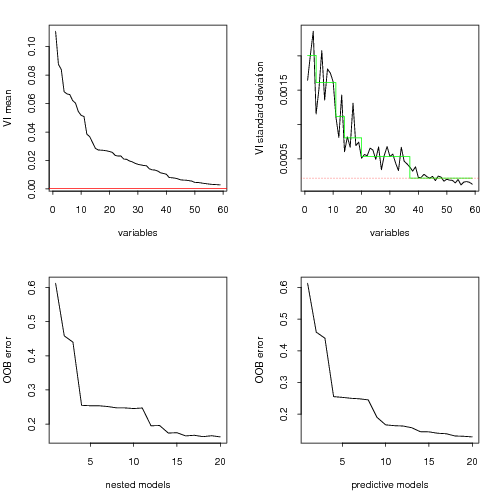

In [80]:
## Display graphs
import wand
from wand.image import Image as WImage
img = WImage(filename=outputgraph)
img

<center> <font size=5> <h1>Classification using Random Forest</h1> </font> </center>  

### Prepare .csv for classification (training set and object to classify)

In [113]:
# Connect to an existing database
db=pg.connect(database=dbname, user=dbuser, password=dbpassword, host=host)
# Open a cursor to perform database operations
cur=db.cursor()

#### Export training set as .csv

In [114]:
### Set if all feature have to be used (vsurfonly=False) 
### or only those resulting from prediction step of VSURF (vsurfonly=True)
vsurfonly=True

In [115]:
## Save list of features to be used 
if vsurfonly:
    features_for_classif=Surf_pred_features
else:
    features_for_classif=list(features.columns.values)[1:]

In [116]:
','.join(features_for_classif)

'ndvi_first_quart,ndvi_third_quart,ndvi_median,opt_nir_first_quart,opt_nir_median,opt_nir_mean,ndvi_mean,ndvi_perc_90,perimeter,opt_green_first_quart,compact_square,opt_blue_first_quart,area,ndsm_median,opt_blue_median,ndvi_min,ndsm_first_quart,opt_blue_stddev,opt_nir_min,fd'

In [117]:
## Define the path to the .csv
training_csv=os.path.join(outputfolder,"training_csv.csv")

In [118]:
#### Export as .csv
# Query
query="COPY (\
SELECT seg_id, class_num, "+", ".join(features_for_classif)+" \
FROM "+classifE_schema+"."+sample_training+") TO '"+training_csv+"' DELIMITER ',' CSV HEADER"
# Execute the CREATE TABLE query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

#### Export objects statistics as .csv

In [119]:
## Evalutate the number of row in 'object_stat' table
query="SELECT reltuples::bigint AS estimated_object \
FROM pg_class \
WHERE oid='"+stat_schema+"."+object_stats_optical+"'::regclass"  
# Execute query through panda
df=pd.read_sql(query, db)
# Save estimated number of objects
estimate=list(df['estimated_object'])[0]
# Print
print "The table contains "+str(estimate)+" rows (estimate)."

The table contains 15775446 rows (estimate).


In [120]:
# Define number of object to classify on each loop
nbobjloop=1000000
# Add 10% of estimated number of rows to be sure to well cover the full dataset 
remaining_rows=int(estimate*1.05)
# Define number of loops for classification
import math
loops=int(math.ceil(remaining_rows/(nbobjloop*1.0)))
## Print what is going to happend
print "Classification will be made on "+str(loops)+" loop(s)"

Classification will be made on 17 loop(s)


In [121]:
# Define starting offset and limit (for the firsth loop)
offset=0
# Declare an empty list containing the paths to .csv
list_objstat_csv=[]
# Export object statistics on multiple .csv files
for loop in range(loops):
    ## Define the path to the .csv
    objstat_csv=os.path.join(outputfolder,"objects_stats_"+str(loop+1)+".csv")
    list_objstat_csv.append(objstat_csv)        
    # Query to export as .csv
    query="COPY (WITH \
    stats AS(SELECT * FROM "+stat_schema+"."+object_stats_optical+")\
    \
    SELECT cat, "+", ".join(features_for_classif)+" \
    FROM stats ORDER BY cat \
    OFFSET "+str(offset)+" LIMIT "+str(nbobjloop)+") TO '"+objstat_csv+"' DELIMITER ',' CSV HEADER"
    # Execute the CREATE TABLE query 
    cur.execute(query)  
    # Print
    print "Rows between "+str(offset)+" and "+str(offset+nbobjloop)+" exported in .csv file '"+objstat_csv+"'"
    # Update offset and limit 
    offset+=nbobjloop

Rows between 0 and 1000000 exported in .csv file '/media/tais/My_Book_1/MAUPP/Traitement/Ouagadougou/Segmentation_fullAOI_localapproach/Results/CLASSIF/classif_E/classification/objects_stats_1.csv'
Rows between 1000000 and 2000000 exported in .csv file '/media/tais/My_Book_1/MAUPP/Traitement/Ouagadougou/Segmentation_fullAOI_localapproach/Results/CLASSIF/classif_E/classification/objects_stats_2.csv'
Rows between 2000000 and 3000000 exported in .csv file '/media/tais/My_Book_1/MAUPP/Traitement/Ouagadougou/Segmentation_fullAOI_localapproach/Results/CLASSIF/classif_E/classification/objects_stats_3.csv'
Rows between 3000000 and 4000000 exported in .csv file '/media/tais/My_Book_1/MAUPP/Traitement/Ouagadougou/Segmentation_fullAOI_localapproach/Results/CLASSIF/classif_E/classification/objects_stats_4.csv'
Rows between 4000000 and 5000000 exported in .csv file '/media/tais/My_Book_1/MAUPP/Traitement/Ouagadougou/Segmentation_fullAOI_localapproach/Results/CLASSIF/classif_E/classification/objects

In [123]:
# Close cursor and communication with the database
cur.close()
db.close()

In [124]:
%%R 

# Install package
if(!is.element('caret', installed.packages()[,1])){
  cat('\n\nInstalling caret package from CRAN')
  chooseCRANmirror(ind=1)
  install.packages('caret')}
# Install package
if(!is.element('randomForest', installed.packages()[,1])){
  cat('\n\nInstalling randomForest package from CRAN')
  chooseCRANmirror(ind=1)
  install.packages('randomForest')}
# Install package
if(!is.element('pROC', installed.packages()[,1])){
  cat('\n\nInstalling pROC package from CRAN')
  chooseCRANmirror(ind=1)
  install.packages('pROC')}
# Install package
if(!is.element('e1071', installed.packages()[,1])){
  cat('\n\nInstalling e1071 package from CRAN')
  chooseCRANmirror(ind=1)
  install.packages('e1071')}

In [125]:
%%R 

# Load libraries
library(parallel)
require(parallel)
library(doParallel)
require(doParallel)
library(caret)
require(caret)
library(randomForest)
require(randomForest)
library(e1071)
require(e1071)

## Train Random Forest model

In [126]:
## Set the path to the output of random forest classification
output_accuracy=os.path.join(outputfolder,"accuracy_RF.csv")

In [127]:
%%R -i training_csv,output_accuracy

# Set number of cores to use
usedcores=detectCores()-5
registerDoParallel(usedcores)

# Import training
training <- read.csv(training_csv, sep=",", header=TRUE, row.names=1)
# Define factor
training$class_num <- as.factor(training$class_num)

# Cross-validation setting
MyFolds.cv <- createMultiFolds(training$class_num, k=5, times=10)
MyControl.cv <- trainControl(method='repeatedCV', index=MyFolds.cv, allowParallel = TRUE)

# Train Random Forest
rfModel <- train(class_num~.,training,method='rf', trControl=MyControl.cv,tuneLength=10)
resamps.cv <- rfModel$resample
accuracy_means <- mean(resamps.cv$Accuracy)
kappa_means <- mean(resamps.cv$Kappa)
df_means <- data.frame(method='rf',accuracy=accuracy_means, kappa=kappa_means)
write.csv(df_means, output_accuracy, row.names=FALSE, quote=FALSE)

In [128]:
#### Show mean accuracy results from cross-validation for tuning
## Import .csv file
accuracy=pd.read_csv(output_accuracy, sep=',',header=0)
## Display table
accuracy.head(15)

,method,accuracy,kappa
0,rf,0.867,0.85082


In [129]:
## Set the path to the output of random forest classification
output_varimp=os.path.join(outputfolder,"VariablesImportance_RF.pdf")
output_rfmodel=os.path.join(outputfolder,"RF_model.txt")
output_cv=os.path.join(outputfolder,"RF_cv.pdf")

In [130]:
%%R -i output_varimp,output_rfmodel,output_cv

# Plot variable importance
library(pROC)
importance <- varImp(rfModel, scale=FALSE)
pdf(output_varimp, width = 11, height = ncol(features)/6 )
print(plot(importance))
dev.off()

# Show final model
tmp<-rfModel$finalModel
sink(output_rfmodel)
print(tmp)
sink()

# Plot cross validation tuning results
pdf(output_cv)
print(plot(rfModel))
dev.off()

png 
  2 


In [131]:
#### Import classifiers tuning parameters and confusion matrix
## Open file
classifier_runs = open(output_rfmodel, 'r')  
## Read file
print classifier_runs.read()


Call:
 randomForest(x = x, y = y, mtry = param$mtry) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 13.19%
Confusion matrix:
    11  13 14  21  22  31  32 33  34  41  51 class.error
11 360   0  0   4   1   2   1  1   0   1   1  0.02964960
13   2 125  0   0   0   0   0  0   0   0   0  0.01574803
14   2   0 92   5   0   0   0  0   0   1   0  0.08000000
21   2   0  3 132  17   0   5  2   0   0   0  0.18012422
22   2   0  0  17 109   0   2  1   0   0   0  0.16793893
31   0   0  0   0   0 136   0  2  16   0   0  0.11688312
32   0   0  1   4   2   0 123 17  14   0   0  0.23602484
33   1   0  2   3   0   0  21 85  23   2   1  0.38405797
34   0   0  0   0   0  17  12 20 225   0   0  0.17883212
41   2   0  1   1   0   0   0  5   0 131   9  0.12080537
51   0   0  0   0   0   2   0  0   0   1 134  0.02189781



The following cell display pdf figures. Please first install the **Wand** package using the folowwing command in the terminal : 

``` sudo pip instal Wand ```

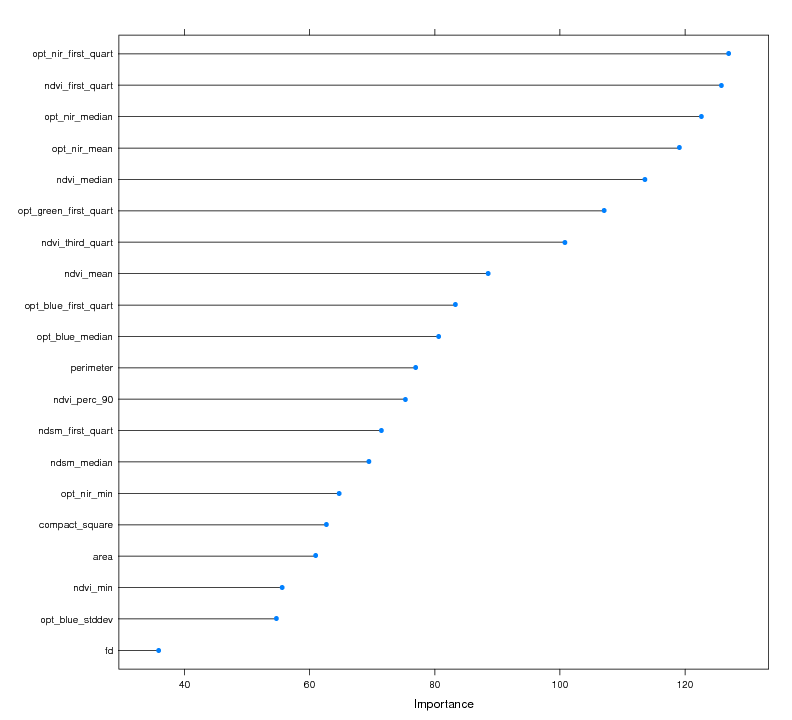

In [132]:
## Display graphs
import wand
from wand.image import Image as WImage
img = WImage(filename=output_varimp)
img

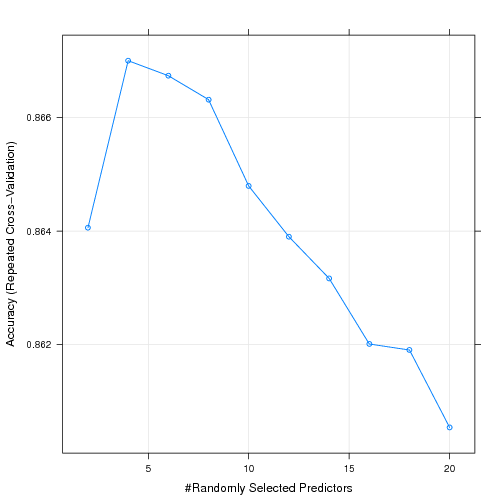

In [133]:
## Display graphs
import wand
from wand.image import Image as WImage
img = WImage(filename=output_cv)
img

## Predict classes for objects

In [134]:
%%R -i list_objstat_csv

# Classification using loop
for(i in 1:length(list_objstat_csv)) {
    filepath<-list_objstat_csv[i]
    # Import object statistics as dataframe
    features <- read.csv(filepath, sep=",", header=TRUE, row.names=1)
    # Predict class 
    predicted <- data.frame(predict(rfModel, features))
    name<-paste('resultsdf',i,sep='')
    assign(name,data.frame(id=rownames(features), predicted))
    rm(features)
    rm(predicted)
    gc()
}


Erreur : variables ‘ndvi_first_quart’, ‘ndvi_third_quart’, ‘ndvi_median’, ‘opt_nir_first_quart’, ‘opt_nir_median’, ‘opt_nir_mean’, ‘ndvi_mean’, ‘ndvi_perc_90’, ‘perimeter’, ‘opt_green_first_quart’, ‘compact_square’, ‘opt_blue_first_quart’, ‘area’, ‘ndsm_median’, ‘opt_blue_median’, ‘ndvi_min’, ‘ndsm_first_quart’, ‘opt_blue_stddev’, ‘opt_nir_min’, ‘fd’ were specified with different types from the fit


/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Erreur : variables ‘ndvi_first_quart’, ‘ndvi_third_quart’, ‘ndvi_median’, ‘opt_nir_first_quart’, ‘opt_nir_median’, ‘opt_nir_mean’, ‘ndvi_mean’, ‘ndvi_perc_90’, ‘perimeter’, ‘opt_green_first_quart’, ‘compact_square’, ‘opt_blue_first_quart’, ‘area’, ‘ndsm_median’, ‘opt_blue_median’, ‘ndvi_min’, ‘ndsm_first_quart’, ‘opt_blue_stddev’, ‘opt_nir_min’, ‘fd’ were specified with different types from the fit

  warnings.warn(x, RRuntimeWarning)


In [135]:
%%R

# Merge predictions in one single dataframe
listdf<-lapply(ls(pattern = "resultsdf*"), get)
rf_predictions<-do.call(rbind,listdf)

### Save training set and predictions in .csv files

In [21]:
## Define outputfile for .csv with training data for R
trainingset_R=os.path.join(outputfolder,"RF_trainingset_R.csv")
## Define outputfile for .csv with predictions of classification
classif_results=os.path.join(outputfolder,"RF_classif_results_R.csv")

In [149]:
%%R -i trainingset_R,classif_results
write.csv(training, file=trainingset_R, row.names=FALSE, quote=FALSE)
write.csv(rf_predictions, file=classif_results, row.names=FALSE, quote=FALSE)

In [150]:
%%R 

# Remove variables not needed anymore
rm(training)
gc()

rm(list=ls(pattern = "resultsdf*"))
rm(listdf)
gc()

           used  (Mb) gc trigger   (Mb)  max used   (Mb)
Ncells 17529087 936.2   29092130 1553.7  20383065 1088.6
Vcells 73307768 559.3  220880902 1685.2 276038395 2106.1


### Delete csv files with object statistics for each loop of classification

In [151]:
for csv in list_objstat_csv:
    os.remove(csv)

<center> <font size=3> <h2>Import classification results in postgis </h2> </font> </center>  

In [23]:
# Connect to an existing database
db=pg.connect(database=dbname, user=dbuser, password=dbpassword, host=host)
# Open a cursor to perform database operations
cur=db.cursor()

### Import predictions of Random forest at level 2

In [24]:
# Drop table if exists:
cur.execute("DROP TABLE IF EXISTS "+classifE_schema+"."+classif)
# Make the changes to the database persistent
db.commit()

# Create new table
query="CREATE TABLE "+classifE_schema+"."+classif+" (seg_id integer PRIMARY KEY, rf_pred_l2 integer)"
# Execute the CREATE TABLE query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

# Create query for copy data from csv
query="COPY "+classifE_schema+"."+classif+" FROM '"+str(classif_results)+"' HEADER DELIMITER ',' CSV" 
# Execute the COPY FROM CSV query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()    

### Merge classes of level 2 to reach level 2b

In [25]:
## Add column for prediction at level 2b
query="ALTER TABLE "+classifE_schema+"."+classif+" ADD COLUMN rf_pred_l2b integer"
# Execute the query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

In [26]:
# Update the value
query="UPDATE "+classifE_schema+"."+classif+" SET \
rf_pred_l2b = '20' WHERE  rf_pred_l2 IN ('21','22')"
# Execute the query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

In [27]:
# Update the value
query="UPDATE "+classifE_schema+"."+classif+" SET \
rf_pred_l2b = '30' WHERE  rf_pred_l2 IN ('32','33','34')"
# Execute the query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

In [28]:
# Update the value
query="UPDATE "+classifE_schema+"."+classif+" SET \
rf_pred_l2b = rf_pred_l2 WHERE rf_pred_l2b IS NULL"
# Execute the query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

### Merge classes of level 2 to reach level 1

In [29]:
## Add column for prediction at level 1
query="ALTER TABLE "+classifE_schema+"."+classif+" ADD COLUMN rf_pred_l1 integer"
# Execute the query 
cur.execute(query)
## Update column for prediction and ground truth at level 2 
query="UPDATE "+classifE_schema+"."+classif+" SET rf_pred_l1=rf_pred_l2/10"
# Execute the query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

### Export to csv for archive

In [30]:
## Define path of .txt file for saving prediction at different level
outputfile=classif_results.split(".")[0]+'_diff_levels.csv'

In [31]:
#### Export as .csv
# Query
query="COPY "+classifE_schema+"."+classif+" TO '"+outputfile+"' DELIMITER ',' CSV HEADER"
# Execute the CREATE TABLE query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

In [32]:
# Close cursor and communication with the database
cur.close()
db.close()

<center> <font size=3> <h2>Accuracy assesment</h2> </font> </center>  

### Change the outputfolder

In [35]:
## Folder in which save processing time output
outputfolder=os.path.join(resultfolder,"accuracy_assess")

## Create the folder if does not exists
if not os.path.exists(outputfolder):
    os.makedirs(outputfolder)
    print "Folder '"+outputfolder+"' created"

## Join sample test and classifier predictions in postgresql

In [70]:
# Connect to an existing database
db=pg.connect(database=dbname, user=dbuser, password=dbpassword, host=host)
# Open a cursor to perform database operations
cur=db.cursor()

In [71]:
# Build a query to drop view if exists
query="DROP TABLE IF EXISTS "+classifE_schema+"."+groundtruth_classif
# Execute the query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

In [72]:
#### Join sample_test and classification results
query="CREATE TABLE "+classifE_schema+"."+groundtruth_classif+" AS (\
SELECT a.cat_point, a.id, \
a.class AS level2_label, \
a.class_b AS level2b_label, \
a.class_l1 AS level1_label, \
a.class_num::integer AS level2_groundtr, \
a.class_num_b::integer AS level2b_groundtr, \
a.class_num_l1::integer AS level1_groundtr, \
c.rf_pred_l2 AS rf_level2, \
c.rf_pred_l2b AS rf_level2b, \
c.rf_pred_l1 AS rf_level1 \
FROM "+sample_schema+"."+sample_opt_test+" AS a \
LEFT JOIN "+classifE_schema+"."+classif+" AS c ON a.seg_id = c.seg_id)"
# Execute the query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

In [73]:
#### Save ground truth, optical_predic, opticalsar_predic as lists, for Level-1 and Level-2
# Query 
query="SELECT * FROM "+classifE_schema+"."+groundtruth_classif+" ORDER BY id"
# Execute query through panda
df=pd.read_sql(query, db)

# Show dataframe
df.head(50)

,cat_point,id,level2_label,level2b_label,level1_label,level2_groundtr,level2b_groundtr,level1_groundtr,rf_level2,rf_level2b,rf_level1
0,582,100,Brown/red bare soil,Bare soils,Natural material surfaces,21,20,2,21,20,2
1,1827,1003,Brown/red bare soil,Bare soils,Natural material surfaces,21,20,2,21,20,2
2,1832,1006,Trees,Trees,Vegetation,31,31,3,31,31,3
3,1846,1015,Other vegetation,Low vegetation,Vegetation,34,30,3,31,31,3
4,1851,1018,Other vegetation,Low vegetation,Vegetation,34,30,3,32,30,3
5,1856,1021,Other vegetation,Low vegetation,Vegetation,34,30,3,34,30,3
6,1858,1022,Brown/red bare soil,Bare soils,Natural material surfaces,21,20,2,21,20,2
7,1859,1024,Mixed bare soil/vegetation,Low vegetation,Vegetation,32,30,3,33,30,3
8,1864,1027,Trees,Trees,Vegetation,31,31,3,34,30,3
9,1867,1029,Inland waters,Inland waters,Water,41,41,4,41,41,4


In [74]:
# Save ground truth - Level2
groundtruth_L2=list(df['level2_groundtr'])
# Save ground truth - Level2b
groundtruth_L2b=list(df['level2b_groundtr'])
# Save ground truth - Level1
groundtruth_L1=list(df['level1_groundtr'])

# Save predictions - level2
prediction_L2=list(df['rf_level2'])
# Save predictions - level2b
prediction_L2b=list(df['rf_level2b'])
# Save predictions - level1
prediction_L1=list(df['rf_level1'])

In [75]:
# Display number of objects in test sample
nrows=len(groundtruth_L2)
print nrows

440


In [76]:
## Zip the list together - Level 2
ziped_results=zip(groundtruth_L2,prediction_L2)
## Sort
ziped_results.sort()
## Unzip
groundtruth_L2,prediction_L2=zip(*ziped_results)

In [77]:
## Zip the list together - Level 2b
ziped_results=zip(groundtruth_L2b,prediction_L2b)
## Sort
ziped_results.sort()
## Unzip
groundtruth_L2b,prediction_L2b=zip(*ziped_results)

In [78]:
## Zip the list together - Level 1
ziped_results=zip(groundtruth_L1,prediction_L1)
## Sort
ziped_results.sort()
## Unzip
groundtruth_L1,prediction_L1=zip(*ziped_results)

In [126]:
## Check if lists contain th same distinct values
tmp1=list(set(groundtruth_L2))
tmp1.sort()
tmp2=list(set(prediction_L2))
tmp2.sort()
if tmp1 != tmp2:
    sys.exit('WARNING: Lists contain different distinct values. Please check before continue')
    
## Check if lists contain th same distinct values
tmp1=list(set(groundtruth_L2b))
tmp1.sort()
tmp2=list(set(prediction_L2b))
tmp2.sort()
if tmp1 != tmp2:
    sys.exit('WARNING: Lists contain different distinct values. Please check before continue')

## Check if lists contain th same distinct values
tmp1=list(set(groundtruth_L1))
tmp1.sort()
tmp2=list(set(prediction_L1))
tmp2.sort()
if tmp1 != tmp2:
    sys.exit('WARNING: Lists contain different distinct values. Please check before continue')

In [80]:
#### Save ground truth, optical_predic, opticalsar_predic as lists, for Level-1 and Level-2
# Query 
query="SELECT DISTINCT level2_groundtr, level2_label \
FROM "+classifE_schema+"."+groundtruth_classif+" ORDER BY level2_groundtr"
# Execute query through panda
df=pd.read_sql(query, db)
# Save ground truth classes labels - Level2
classes_L2=list(df['level2_label'])

# Query 
query="SELECT DISTINCT level2b_groundtr, level2b_label \
FROM "+classifE_schema+"."+groundtruth_classif+" ORDER BY level2b_groundtr"
# Execute query through panda
df=pd.read_sql(query, db)
# Save ground truth classes labels - Level2
classes_L2b=list(df['level2b_label'])

# Query 
query="SELECT DISTINCT level1_groundtr, level1_label \
FROM "+classifE_schema+"."+groundtruth_classif+" ORDER BY level1_groundtr"
# Execute query through panda
df=pd.read_sql(query, db)
# Save ground truth classes labels - Level2
classes_L1=list(df['level1_label'])

In [81]:
print "Level 2 classes:\n\n"+'\n'.join(classes_L2)

Level 2 classes:

Buildings
Swimming pools
Asphalt surfaces
Brown/red bare soil
White/grey bare soil
Trees
Mixed bare soil/vegetation
Dry vegetation
Other vegetation
Inland waters
Shadows


In [82]:
print "Level 2 classes:\n\n"+'\n'.join(classes_L2b)

Level 2 classes:

Buildings
Swimming pools
Asphalt surfaces
Bare soils
Low vegetation
Trees
Inland waters
Shadows


In [83]:
print "Level 2 classes:\n\n"+'\n'.join(classes_L1)

Level 2 classes:

Artificial surfaces
Natural material surfaces
Vegetation
Water
Shadows


<center> <font size=4>  <h2>Confusion matrix</h2> </font> </center>

The classification performance evaluation is made mainly using [Scikit-learn](http://scikit-learn.org/stable/modules/model_evaluation.html).

The trick to plot the confusion matrix was found [here](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py).

In [84]:
## Import libraries
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
%matplotlib inline  

In [85]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, ha='right', rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, round(cm[i, j],2),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Level 2

In [94]:
# Compute confusion matrix
cnf_matrix_L2=confusion_matrix(groundtruth_L2, prediction_L2)

In [95]:
## Set the path to the output
output_rowconfmat=os.path.join(outputfolder,"rowconfusionmatrix_L2.txt")

## Export the row confusion matrix
numpy.savetxt(output_rowconfmat, cnf_matrix_L2.astype(np.int), fmt='%d', delimiter=",")

Confusion matrix, without normalization
Normalized confusion matrix


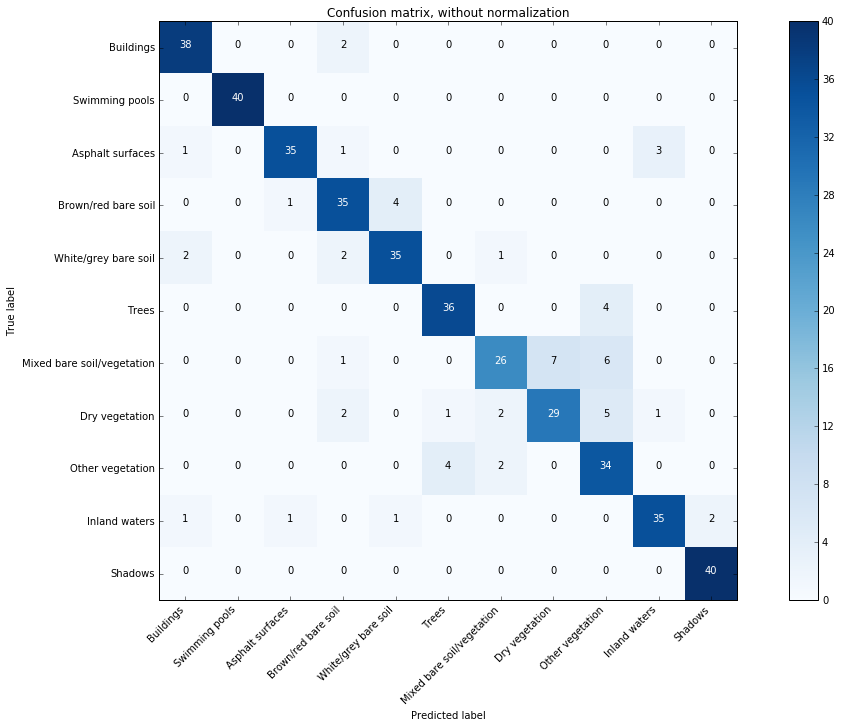

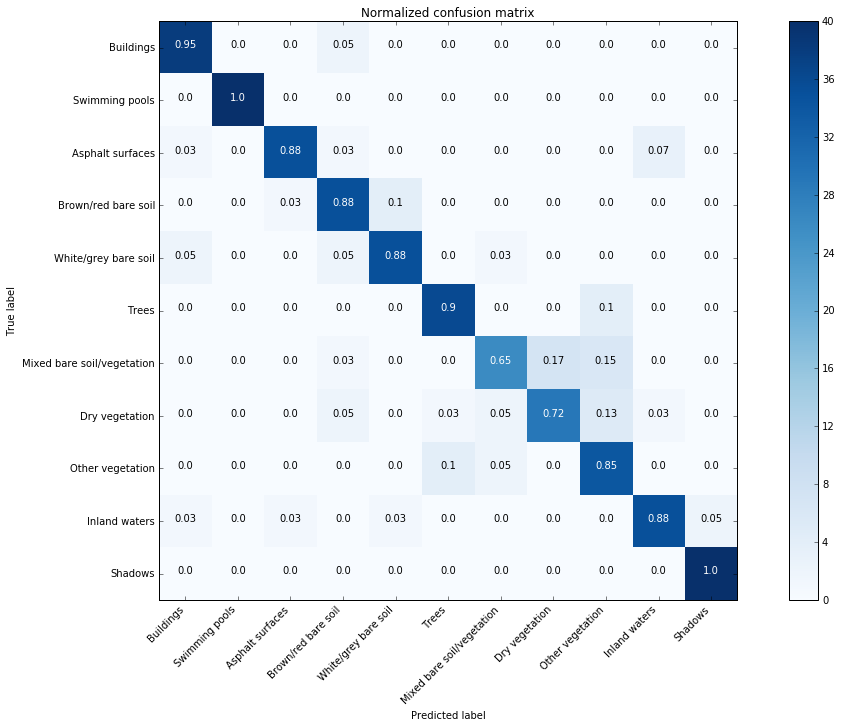

In [96]:
# Plot non-normalized confusion matrix
fig_cm=plt.figure(figsize=(15,10))
plot_confusion_matrix(cnf_matrix_L2, classes=classes_L2,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
fig_cm_normal=plt.figure(figsize=(15,10))
plot_confusion_matrix(cnf_matrix_L2, classes=classes_L2, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [97]:
## Set the path to the output
output_confmat_pdf=os.path.join(outputfolder,"confusionmatrix_L2.pdf")
output_confmatA_png=os.path.join(outputfolder,"confusionmatrixA_L2.png")
output_confmatB_png=os.path.join(outputfolder,"confusionmatrixB_L2.png")

In [98]:
# Export in PDF
from matplotlib.backends.backend_pdf import PdfPages
pp=PdfPages(output_confmat_pdf)
pp.savefig(fig_cm)
pp.savefig(fig_cm_normal)
pp.close()

# Export in PNG
fig_cm.savefig(output_confmatA_png, format='png', dpi=300)
fig_cm_normal.savefig(output_confmatB_png, format='png', dpi=300)

### Level 2b

In [99]:
# Compute confusion matrix
cnf_matrix_L2b=confusion_matrix(groundtruth_L2b, prediction_L2b)

In [100]:
## Set the path to the output
output_rowconfmat=os.path.join(outputfolder,"rowconfusionmatrix_L2b.txt")

## Export the row confusion matrix
numpy.savetxt(output_rowconfmat, cnf_matrix_L2b.astype(np.int), fmt='%d', delimiter=",")

Confusion matrix, without normalization
Normalized confusion matrix


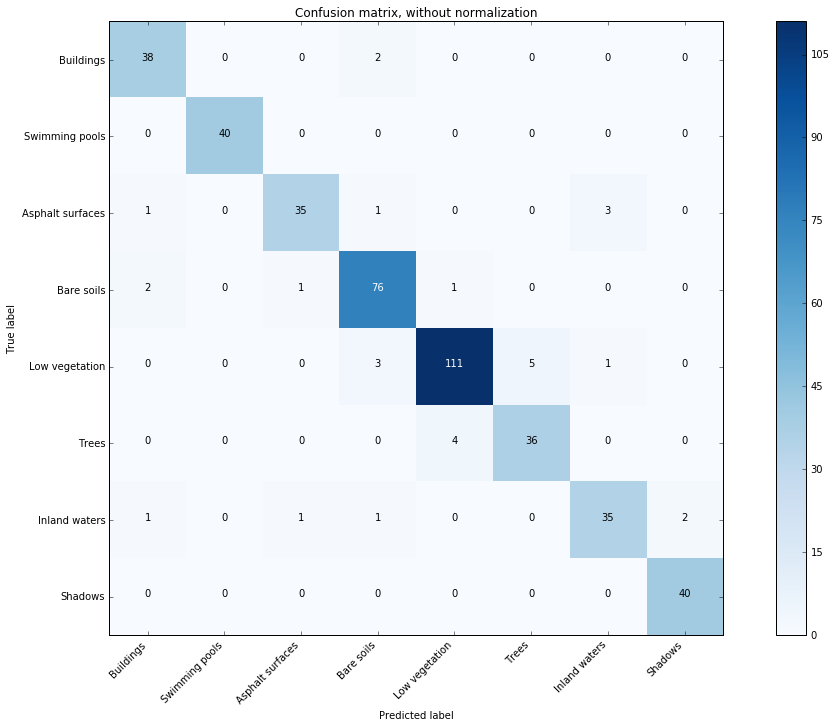

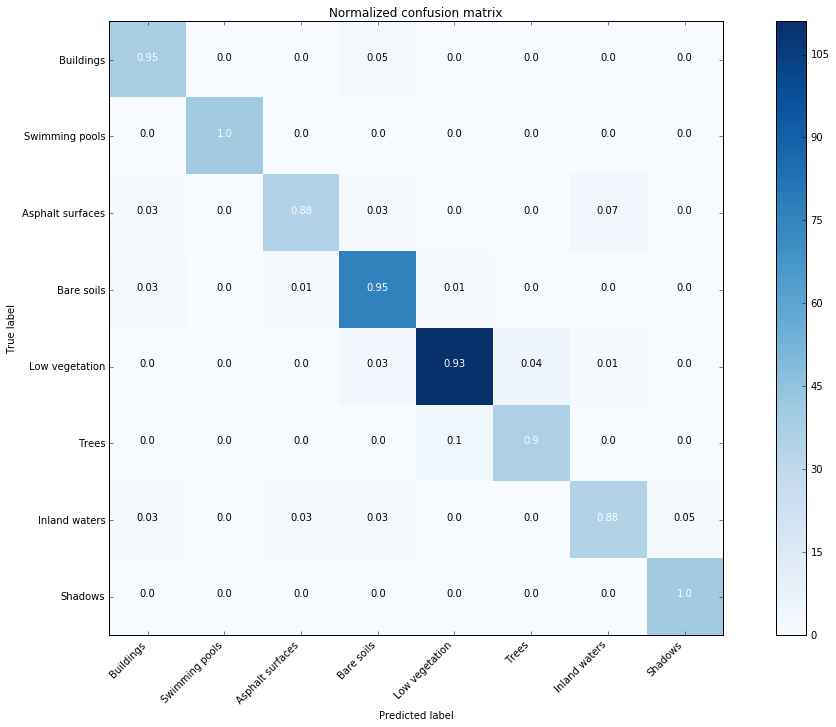

In [101]:
# Plot non-normalized confusion matrix
fig_cm=plt.figure(figsize=(15,10))
plot_confusion_matrix(cnf_matrix_L2b, classes=classes_L2b,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
fig_cm_normal=plt.figure(figsize=(15,10))
plot_confusion_matrix(cnf_matrix_L2b, classes=classes_L2b, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [102]:
## Set the path to the output
output_confmat_pdf=os.path.join(outputfolder,"confusionmatrix_L2b.pdf")
output_confmatA_png=os.path.join(outputfolder,"confusionmatrixA_L2b.png")
output_confmatB_png=os.path.join(outputfolder,"confusionmatrixB_L2b.png")

In [103]:
# Export in PDF
from matplotlib.backends.backend_pdf import PdfPages
pp=PdfPages(output_confmat_pdf)
pp.savefig(fig_cm)
pp.savefig(fig_cm_normal)
pp.close()

# Export in PNG
fig_cm.savefig(output_confmatA_png, format='png', dpi=300)
fig_cm_normal.savefig(output_confmatB_png, format='png', dpi=300)

### Level 1

In [104]:
# Compute confusion matrix
cnf_matrix_L1=confusion_matrix(groundtruth_L1, prediction_L1)

In [105]:
## Set the path to the output
output_rowconfmat=os.path.join(outputfolder,"rowconfusionmatrix_L1.txt")

## Export the row confusion matrix
numpy.savetxt(output_rowconfmat, cnf_matrix_L1.astype(np.int), fmt='%d', delimiter=",")

Confusion matrix, without normalization
Normalized confusion matrix


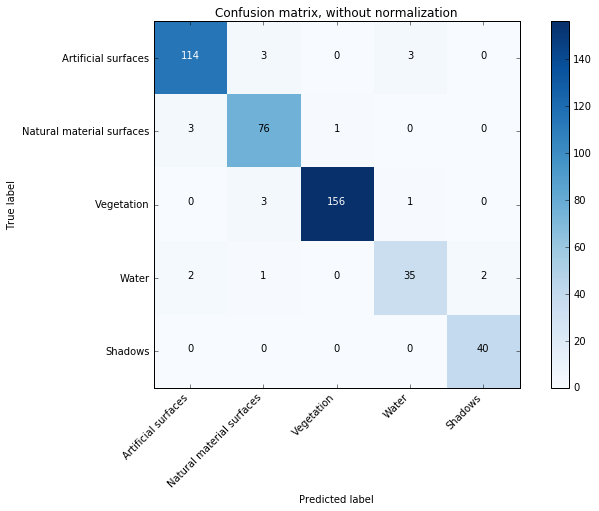

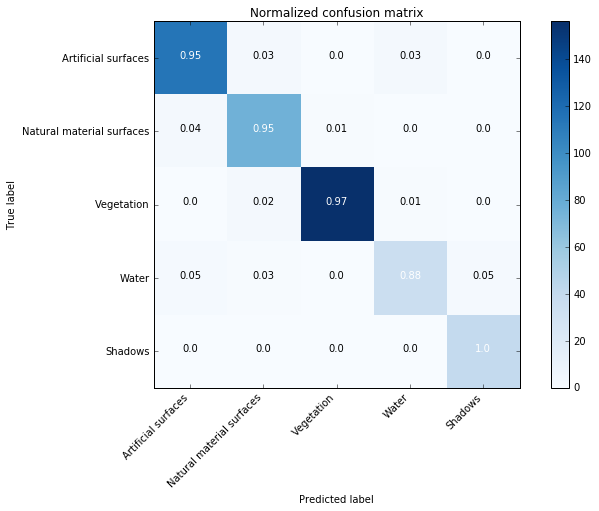

In [106]:
# Plot non-normalized confusion matrix
fig_cm=plt.figure(figsize=(10,7))
plot_confusion_matrix(cnf_matrix_L1, classes=classes_L1,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
fig_cm_normal=plt.figure(figsize=(10,7))
plot_confusion_matrix(cnf_matrix_L1, classes=classes_L1, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [107]:
## Set the path to the output
output_confmat_pdf=os.path.join(outputfolder,"confusionmatrix_L1.pdf")
output_confmatA_png=os.path.join(outputfolder,"confusionmatrixA_L1.png")
output_confmatB_png=os.path.join(outputfolder,"confusionmatrixB_L1.png")

In [108]:
# Export in PDF
from matplotlib.backends.backend_pdf import PdfPages
pp=PdfPages(output_confmat_pdf)
pp.savefig(fig_cm)
pp.savefig(fig_cm_normal)
pp.close()

# Export in PNG
fig_cm.savefig(output_confmatA_png, format='png', dpi=300)
fig_cm_normal.savefig(output_confmatB_png, format='png', dpi=300)

<center> <font size=4>  <h2>Accuracy measures</h2> </font> </center>

## Classification report

TODO: Find a way to compute comission and omission errore / User's Producers' accuracies

In [109]:
## Import libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report

from sklearn.metrics import f1_score

#### Level 2

In [110]:
## Set the path to the output
output=os.path.join(outputfolder,"RF_classif_repport_L2.txt")

In [111]:
# Define dataset to take into account
y_true=groundtruth_L2
y_pred=prediction_L2
class_label=classes_L2

# Compute precision accuracy
accuracy=accuracy_score(y_true, y_pred, normalize=True)
# Compute Cohen's Kappa
cohen_kappa=cohen_kappa_score(y_true, y_pred)
# Compute f1-score
f_1=f1_score(y_true, y_pred, average='weighted')
# Compute 'classification report'
classif_report=classification_report(y_true, y_pred, target_names=class_label)

# Save as .txt file
f=open(output, 'w')
f.write("Performance evalutation: \n")
f.write("Overall Accuracy: "+str(accuracy)+"\n")
f.write("Cohen's Kappa: "+str(cohen_kappa)+"\n")
f.write("F1-score: "+str(f_1)+"\n")
f.write("\n\n")
f.write("Classification report: \n "+classif_report)
f.close()

# Show file content
f=open(output,'r')
file_contents=f.read()
print (file_contents)
f.close()

Performance evalutation: 
Overall Accuracy: 0.870454545455
Cohen's Kappa: 0.8575
F1-score: 0.869496860952


Classification report: 
                             precision    recall  f1-score   support

                 Buildings       0.90      0.95      0.93        40
            Swimming pools       1.00      1.00      1.00        40
          Asphalt surfaces       0.95      0.88      0.91        40
       Brown/red bare soil       0.81      0.88      0.84        40
      White/grey bare soil       0.88      0.88      0.88        40
                     Trees       0.88      0.90      0.89        40
Mixed bare soil/vegetation       0.84      0.65      0.73        40
            Dry vegetation       0.81      0.72      0.76        40
          Other vegetation       0.69      0.85      0.76        40
             Inland waters       0.90      0.88      0.89        40
                   Shadows       0.95      1.00      0.98        40

               avg / total       0.87      0.87  

#### Level 2b

In [112]:
## Set the path to the output
output=os.path.join(outputfolder,"RF_classif_repport_L2b.txt")

In [113]:
# Define dataset to take into account
y_true=groundtruth_L2b
y_pred=prediction_L2b
class_label=classes_L2b

# Compute precision accuracy
accuracy=accuracy_score(y_true, y_pred, normalize=True)
# Compute Cohen's Kappa
cohen_kappa=cohen_kappa_score(y_true, y_pred)
# Compute f1-score
f_1=f1_score(y_true, y_pred, average='weighted')
# Compute 'classification report'
classif_report=classification_report(y_true, y_pred, target_names=class_label)

# Save as .txt file
f=open(output, 'w')
f.write("Performance evalutation: \n")
f.write("Overall Accuracy: "+str(accuracy)+"\n")
f.write("Cohen's Kappa: "+str(cohen_kappa)+"\n")
f.write("F1-score: "+str(f_1)+"\n")
f.write("\n\n")
f.write("Classification report: \n "+classif_report)
f.close()

# Show file content
f=open(output,'r')
file_contents=f.read()
print (file_contents)
f.close()

Performance evalutation: 
Overall Accuracy: 0.934090909091
Cohen's Kappa: 0.921909424725
F1-score: 0.933959940444


Classification report: 
                   precision    recall  f1-score   support

       Buildings       0.90      0.95      0.93        40
  Swimming pools       1.00      1.00      1.00        40
Asphalt surfaces       0.95      0.88      0.91        40
      Bare soils       0.92      0.95      0.93        80
  Low vegetation       0.96      0.93      0.94       120
           Trees       0.88      0.90      0.89        40
   Inland waters       0.90      0.88      0.89        40
         Shadows       0.95      1.00      0.98        40

     avg / total       0.93      0.93      0.93       440



#### Level 1

In [114]:
## Set the path to the output
output=os.path.join(outputfolder,"RF_classif_repport_L1.txt")

In [115]:
# Define dataset to take into account
y_true=groundtruth_L1
y_pred=prediction_L1
class_label=classes_L1

# Compute precision accuracy
accuracy=accuracy_score(y_true, y_pred, normalize=True)
# Compute Cohen's Kappa
cohen_kappa=cohen_kappa_score(y_true, y_pred)
# Compute f1-score
f_1=f1_score(y_true, y_pred, average='weighted')
# Compute 'classification report'
classif_report=classification_report(y_true, y_pred, target_names=class_label)

# Save as .txt file
f=open(output, 'w')
f.write("Performance evalutation: \n")
f.write("Overall Accuracy: "+str(accuracy)+"\n")
f.write("Cohen's Kappa: "+str(cohen_kappa)+"\n")
f.write("F1-score: "+str(f_1)+"\n")
f.write("\n\n")
f.write("Classification report: \n "+classif_report)
f.close()

# Show file content
f=open(output,'r')
file_contents=f.read()
print (file_contents)
f.close()

Performance evalutation: 
Overall Accuracy: 0.956818181818
Cohen's Kappa: 0.942073170732
F1-score: 0.956868143987


Classification report: 
                            precision    recall  f1-score   support

      Artificial surfaces       0.96      0.95      0.95       120
Natural material surfaces       0.92      0.95      0.93        80
               Vegetation       0.99      0.97      0.98       160
                    Water       0.90      0.88      0.89        40
                  Shadows       0.95      1.00      0.98        40

              avg / total       0.96      0.96      0.96       440



<center> <font size=3> <h2>Reclass segmentation rasters with classification results</h2> </font> </center>  

In [116]:
## Print current mapset
print "You are currently working in the <"+str(mapsetname)+"> mapset"

You are currently working in the <classif_E> mapset


#### Change the outputfolder

In [117]:
## Folder in which save processing time output
outputfolder=os.path.join(resultfolder,"classified_rasters")

## Create the folder if does not exists
if not os.path.exists(outputfolder):
    os.makedirs(outputfolder)
    print "Folder '"+outputfolder+"' created"

## Reclass segmentation raster

Here after, the segment raster will be reclassed (using r.reclass) with the classification results.

In [118]:
# Connect to an existing database
db=pg.connect(database=dbname, user=dbuser, password=dbpassword, host=host)
# Open a cursor to perform database operations
cur=db.cursor()

In [119]:
print "Start creating classified rasters"

classif_suffix=('l2','l2b','l1')
for x in classif_suffix:
    ## Set name for raster with the prediction at level 2
    prediction_raster='rf_classif_'+x

    #### Save 'seg_id' and the corresponding prediction for in a list
    query="SELECT seg_id, rf_pred_"+x+" FROM "+classifE_schema+"."+classif
    df=pd.read_sql(query, db)

    # Save seg_id of objects in a list
    listsegid=list(df['seg_id'])
    # Save predictions at level_2 in a list
    listpredict=list(df['rf_pred_'+x])

    if len(listsegid) <> len(listpredict):
        sys.exit('WARNING: lenght of lists containing segid and prediction are not the same. Please check before continue')
    else:
        nrows=len(listsegid)
        print str(nrows)+" segment are going to be reclassified"
    
    ##### Reclassify raster
    ## Create a temporary 'reclass_rule.csv' file
    temprulecsv=os.path.join(tempfile.gettempdir(),"reclass_rules.csv") # Define the csv output file name
    f = open(temprulecsv, 'w')
    # Write rules in the csv file
    for i in range(0,nrows-1):
        f.write(str(listsegid[i]))
        f.write("=")
        f.write(str(listpredict[i]))
        f.write("\n")
    f.write("*")
    f.write("=")
    f.write("NULL")
    f.close()

    ## Reclass segments raster layer to keep only outliers segments, using the reclas_rule.csv file (create temporary raster)
    grass.run_command('g.region', overwrite=True, raster="segments"+"@"+user["classificationA_mapsetname"])
    print ("Working on <"+prediction_raster+">: Reclassify original segment layer")
    grass.run_command('r.reclass', overwrite=True, input="segments"+"@"+user["classificationA_mapsetname"], 
                      output=prediction_raster, rules=temprulecsv)
    os.remove(temprulecsv)

    #### Create 'real raster'
    #### Make a copy of the classified maps of faster display in GRASS GIS
    ## Saving current time for processing time management
    print ("Working on <"+prediction_raster+">: Make hard copy of the reclassified layer")
    ## Set computational region
    grass.run_command('g.region', overwrite=True, raster="segments"+"@"+user["classificationA_mapsetname"])
    ## Create the same raster with r.mapcalc
    formula=prediction_raster+"_temp="+prediction_raster
    grass.mapcalc(formula, overwrite=True)
    ## Rename the new raster with the name of the original one (will be overwrited)
    print ("Working on <"+prediction_raster+">: Renaming layer")
    renameformula=prediction_raster+"_temp,"+prediction_raster
    grass.run_command('g.rename', overwrite=True, raster=renameformula)

Start creating classified rasters
15775526 segment are going to be reclassified
Working on <rf_classif_l2>: Reclassify original segment layer
Working on <rf_classif_l2>: Make hard copy of the reclassified layer
Working on <rf_classif_l2>: Renaming layer
15775526 segment are going to be reclassified
Working on <rf_classif_l2b>: Reclassify original segment layer
Working on <rf_classif_l2b>: Make hard copy of the reclassified layer
Working on <rf_classif_l2b>: Renaming layer
15775526 segment are going to be reclassified
Working on <rf_classif_l1>: Reclassify original segment layer
Working on <rf_classif_l1>: Make hard copy of the reclassified layer
Working on <rf_classif_l1>: Renaming layer


### Change color table and export in .tif

In [120]:
# Define color table. Replace with the RGB values of wanted colors of each class
color_rule="11  227:26:28"+"\n"
color_rule+="12  255:141:1"+"\n"
color_rule+="13  94:221:227"+"\n"
color_rule+="14  102:102:102"+"\n"
color_rule+="21  246:194:142"+"\n"
color_rule+="22  211:217:173"+"\n"
color_rule+="31  0:128:0"+"\n"
color_rule+="32  189:255:185"+"\n"
color_rule+="33  88:190:141"+"\n"
color_rule+="34  29:220:0"+"\n"
color_rule+="41  30:30:192"+"\n"
color_rule+="51  0:0:0"+"\n"

## Create a temporary 'color_table.txt' file
color_table=os.path.join(outputfolder,"color_table_l2.txt") # Define the csv output file name
f = open(color_table, 'w')
f.write(color_rule)
f.close()

In [121]:
# Define color table. Replace with the RGB values of wanted colors of each class
color_rule="11  227:26:28"+"\n"
color_rule+="12  255:141:1"+"\n"
color_rule+="13  94:221:227"+"\n"
color_rule+="14  102:102:102"+"\n"
color_rule+="20  211:217:173"+"\n"
color_rule+="30  29:220:0"+"\n"
color_rule+="31  0:128:0"+"\n"
color_rule+="41  30:30:192"+"\n"
color_rule+="51  0:0:0"+"\n"

## Create a temporary 'color_table.txt' file
color_table=os.path.join(outputfolder,"color_table_l2b.txt") # Define the csv output file name
f = open(color_table, 'w')
f.write(color_rule)
f.close()

In [122]:
# Define color table. Replace with the RGB values of wanted colors of each class
color_rule="1   227:26:28"+"\n"
color_rule+="2   211:217:173"+"\n"
color_rule+="3   29:220:0"+"\n"
color_rule+="4   30:30:192"+"\n"
color_rule+="5   0:0:0"+"\n"

## Create a temporary 'color_table.txt' file
color_table=os.path.join(outputfolder,"color_table_l1.txt") # Define the csv output file name
f = open(color_table, 'w')
f.write(color_rule)
f.close()

In [123]:
# Create a list with classified raster
classifiedraster_list=grass.list_strings("rast", pattern="rf_classif_*", flag='r', mapset=classifE_schema)
print classifiedraster_list

['rf_classif_l1@classif_E', 'rf_classif_l2@classif_E', 'rf_classif_l2b@classif_E']


In [124]:
for prediction_raster in classifiedraster_list:
    ## Apply new color the existing GRASS colortable (for faster display in GRASS map display)
    suffix=prediction_raster.split("@")[0].split("_")[-1]
    color_table_file=os.path.join(outputfolder,"color_table_"+suffix+".txt")
    grass.run_command('r.colors', map=prediction_raster, rules=color_table_file)

#### Export of classification raster

In [125]:
## Saving current time for processing time management
print ("Export classified raster maps on " + time.ctime())
begintime_exportraster=time.time()

for prediction_raster in classifiedraster_list:
    outputname=os.path.join(outputfolder,prediction_raster+".tif")
    grass.run_command('g.region', overwrite=True, raster=prediction_raster)
    grass.run_command('r.out.gdal', overwrite=True, input=prediction_raster, output=outputname, format='GTiff')
    
## Compute processing time and print it
print_processing_time(begintime_exportraster, "Classified raster maps exported in ")

Export classified raster maps on Wed Dec  6 22:03:35 2017


'Classified raster maps exported in 7 minutes and 26.3 seconds'

<left> <font size=4> <b> End of classification part </b> </font> </left> 

In [ ]:
print("The script ends at "+ time.ctime())
print_processing_time(begintime_segmentation_full, "Entire process has been achieved in ")